In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import torch
torch.cuda.is_available()

True

In [2]:
import pandas as pd
import glob

import os

path = r'./data/Berlin_2019/'
all_files = glob.glob(os.path.join(path, "det_val_hr_2019_*.csv"))
df_from_each_file = (pd.read_csv(f, sep=',') for f in all_files)
df_merged   = pd.concat(df_from_each_file, ignore_index=True)
df_merged.to_csv( "./data/merged_Berlin_2019.csv")

df = pd.read_csv('./data/merged_Berlin_2019.csv', quotechar = ';')

df.head()


,Unnamed: 0,detid_15;tag;stunde;qualitaet;q_kfz_det_hr;v_kfz_det_hr;q_pkw_det_hr;v_pkw_det_hr;q_lkw_det_hr;v_lkw_det_hr
0,0,100101010000167;01.02.00;0;1;150;73.3;124;75.4...
1,1,100101010000167;01.02.00;1;1;106;72.1;85;76.6;...
2,2,100101010000167;01.02.00;2;1;98;69.9;76;73.6;2...
3,3,100101010000167;01.02.00;3;1;105;67.2;70;77.2;...
4,4,100101010000167;01.02.00;4;1;196;69.7;145;74.6...


In [3]:
import csv

data_saved=[]

with open('./data/merged_Berlin_2019.csv', newline='') as csvfile:
     spamreader = csv.reader(csvfile, delimiter=' ', quotechar=';')
     headers = next(spamreader) 
    
     for row in spamreader:
            
         a=row[0].split(';') 
      
         #print(a)
         data_saved.append(a)


In [4]:
header=['detid_15' ,'tag','stunde','qualitaet','q_kfz_det_hr','v_kfz_det_hr','q_pkw_det_hr','v_pkw_det_hr','q_lkw_det_hr', 'v_lkw_det_hr']

with open('./data/merged_Berlin_2019.csv', 'w', encoding='UTF8') as f:
    
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(data_saved)

In [5]:
df = pd.read_csv('./data/merged_Berlin_2019.csv', quotechar = ';')

df.head()

,detid_15,tag,stunde,qualitaet,q_kfz_det_hr,v_kfz_det_hr,q_pkw_det_hr,v_pkw_det_hr,q_lkw_det_hr,v_lkw_det_hr
"""0","100101010000167""",01.02.00,0,1.0,150,73.3,124,75.4,26,62.8
"""1","100101010000167""",01.02.00,1,1.0,106,72.1,85,76.6,21,54.1
"""2","100101010000167""",01.02.00,2,1.0,98,69.9,76,73.6,22,56.8
"""3","100101010000167""",01.02.00,3,1.0,105,67.2,70,77.2,35,47.3
"""4","100101010000167""",01.02.00,4,1.0,196,69.7,145,74.6,51,55.8


In [45]:
print('number of all sensors:',len(df['detid_15'].unique()))

sensors= set(df['detid_15'].unique())
     


number of all sensors: 589


In [8]:
import re 

df_new = df[ ['detid_15' ,'tag','stunde','qualitaet','q_pkw_det_hr','v_pkw_det_hr' ] ]

#df_mid ['detid_15'] = df_mid ['detid_15'].map(lambda x: re.sub(r'"', '', x))
  
#df_new=df_new [df_new.v_pkw_det_hr > 0]

#df_mid .to_csv('./data/Berlin_traffic_data.csv')

df_new .head()

#df.loc[:, 0:7]


,detid_15,tag,stunde,qualitaet,q_pkw_det_hr,v_pkw_det_hr
"""0","100101010000167""",01.02.00,0,1.0,124,75.4
"""1","100101010000167""",01.02.00,1,1.0,85,76.6
"""2","100101010000167""",01.02.00,2,1.0,76,73.6
"""3","100101010000167""",01.02.00,3,1.0,70,77.2
"""4","100101010000167""",01.02.00,4,1.0,145,74.6


In [9]:

print(len(set(df_new['detid_15'].unique())))

sensors=set(df_new['detid_15'].unique())

print(len(df_new['q_pkw_det_hr']))

print(len(df_new['v_pkw_det_hr']))

589
5036792
5036792


In [11]:
from collections import defaultdict


id_speed=defaultdict(list)
id_quantity=defaultdict(list)

for index, row in df_new.iterrows():
        
    id_speed[row['detid_15'][:-1]].append(row['v_pkw_det_hr'])
    id_quantity[row['detid_15'][:-1]].append(row['q_pkw_det_hr'])
        
        

In [12]:
with open('./data/Berlin_raw_speed.csv', mode='w', newline='') as csv_file:
    
   csv_writer = csv.writer(csv_file)

   #header=['det_id', 'speed_sequence']
    
   #csv_writer.writerow(header) 

   for i in list(id_speed):
        
        row= [i]+id_speed[i]

        csv_writer.writerow(row)


        
with open('./data/Berlin_sequence_length.csv', mode='w', newline='') as csv_file:
    
        csv_writer = csv.writer(csv_file)
    
        header=['det_id', 'sequence_length']
        
        csv_writer.writerow(header) 
        
        for i in list(id_speed): 
        
           row=[i, len(id_speed[i])]

           csv_writer.writerow(row)

In [13]:

num_no_car={}

for i in list(id_speed):
    
    counter= 0
    
    for j in id_speed[i]:
      if j==-1:
        
        counter+=1
    num_no_car[i]=counter
        


with open('./data/DetID_no_car.csv', mode='w', newline='') as csv_file:
    
    csv_writer = csv.writer(csv_file)
    
    header=['det_id', 'number_of_no_car']
    csv_writer.writerow(header) 
        
    for i in list(num_no_car): 
        
           row=[i, num_no_car[i]]

           csv_writer.writerow(row)
    

In [14]:
detID_collect=set()

for i in id_speed:
    if -1 in id_speed[i]:
        
        continue
        
    
    detID_collect.add(i)

print('number of valid sensors:',len(detID_collect))

number of valid sensors: 289


In [61]:
from collections import Counter

speed_list=[]
speed_seq=[]
seq_length=[]

for i in detID_collect:
    
    seq_length.append(len(id_speed[i]))
    
    for j in id_speed[i]:
        speed_seq.append(j)
        
        
    
min_length= min(seq_length)   

print('min length sequence:', min_length)   
print('max length sequence:', max(seq_length))
print('min_speed:',min(speed_seq))
print('max_speed:',max(speed_seq))

Elements_with_frequency = Counter(speed_seq)
print('mode_speed:',Elements_with_frequency.most_common(1)[0][0])

speed_list=[]
for i in detID_collect:
    
    speed_list.append(id_speed[i][:min_length] )
   
  


min length sequence: 6344
max length sequence: 8622
min_speed: 2.3
max_speed: 165.5
mode_speed: 46.8


random sensor 100101010094541


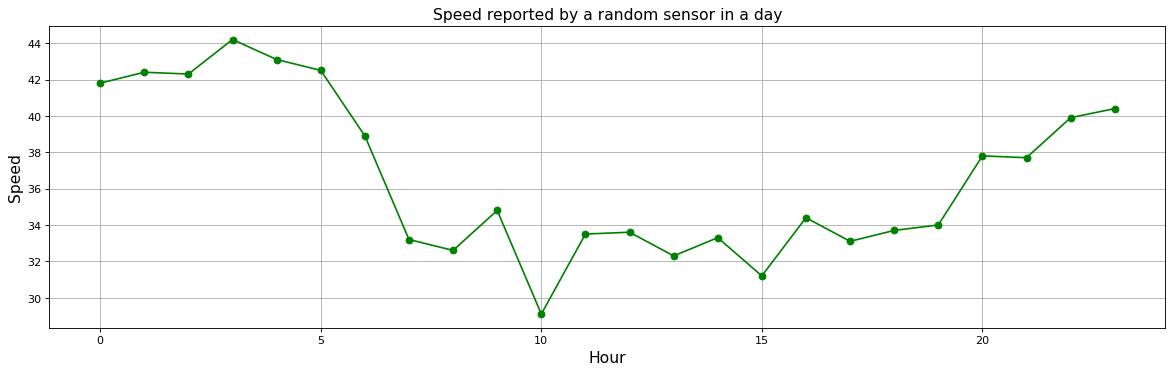

In [38]:

a=np.random.choice(list(detID_collect))

print('random sensor', a)

speed=[]
for i in id_speed[a]:
    
    speed.append(i)
    
from matplotlib.pyplot import figure   
    
figure(figsize=(18, 5), dpi=80)  

    
    
Data = {'h': list(range(24)),
        's': id_speed[a][0:24]
       }

  
dff = pd.DataFrame(Data,columns=['h','s'])
  
plt.plot(dff['h'], dff['s'], color='g' , marker='o') #marker='o'
plt.title('Speed reported by a random sensor in a day', fontsize=14)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Speed', fontsize=14)


plt.grid(True)
plt.show()     
    
    


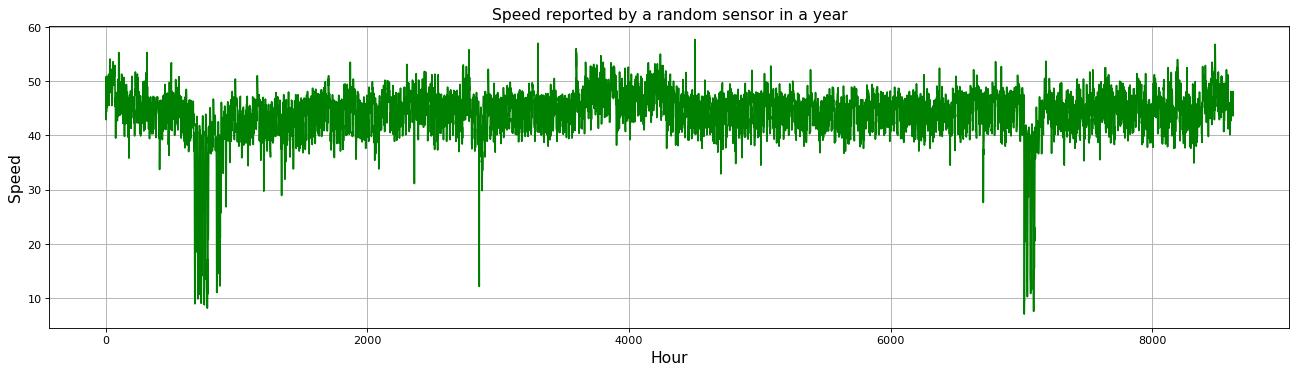

In [39]:
a=np.random.choice(list(detID_collect))

speed=[]
for i in id_speed[a]:
    
    speed.append(i)
    
figure(figsize=(20, 5), dpi=80)  

    
    
Data = {'h': list(range(len(id_speed[a]))),
        's': id_speed[a]
       }

  
dff = pd.DataFrame(Data,columns=['h','s'])
  
plt.plot(dff['h'], dff['s'], color='g') #marker='o'
plt.title('Speed reported by a random sensor in a year', fontsize=14)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Speed', fontsize=14)


plt.grid(True)
plt.show()  

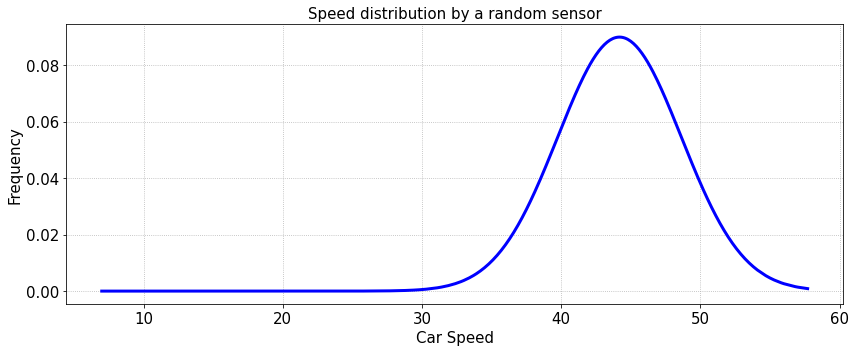

In [49]:
from scipy import stats
from matplotlib.pyplot import figure

fig, ax = plt.subplots()
fig.set_size_inches(12, 5)


ax.grid(True)
ax.grid(linestyle=':')
speed.sort()
hmean = np.mean(speed)
hstd = np.std(speed)
pdf = stats.norm.pdf(speed, hmean, hstd)
plt.plot(speed, pdf, color= 'blue', linewidth=3)

plt.xlabel('Car Speed', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Speed distribution by a random sensor', fontsize=15)


plt.tick_params(axis='both',labelsize=15)
fig.tight_layout()



plt.show() 

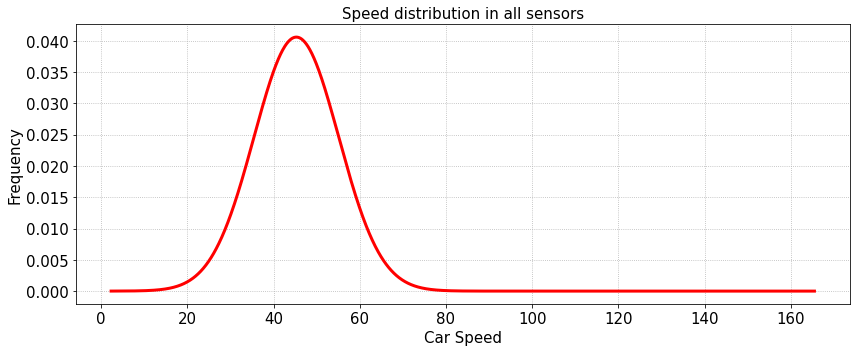

In [62]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)


ax.grid(True)
ax.grid(linestyle=':')
speed_seq.sort()
hmean = np.mean(speed_seq)
hstd = np.std(speed_seq)
pdf = stats.norm.pdf(speed_seq, hmean, hstd)
plt.plot(speed_seq, pdf, color= 'r', linewidth=3)

plt.xlabel('Car Speed', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Speed distribution in all sensors', fontsize=15)


plt.tick_params(axis='both',labelsize=15)
fig.tight_layout()



plt.show() 

In [46]:
 
m=np.array(speed_list) 

speed_array=np.rot90(m)

print('speed matrix shape:',m.shape)

np.savetxt("./data/Berlin_speed.csv", speed_array, delimiter=",", fmt='%s')



speed matrix shape: (289, 6344)


In [24]:
df_speed = pd.read_csv('./data/Berlin_speed.csv')

df_speed

,55.5,44.7,27.3,42.3,46.6,44.7.1,43.2,42.6,42.4,39.5,...,52.1,60.2,39.9.1,50.1.1,41.1.4,38.1.1,49.0.1,52.8,32.8.1,51.7.1
0,54.4,44.0,29.4,39.8,47.8,46.6,43.3,42.9,43.1,37.0,...,49.4,61.0,41.9,52.0,39.4,37.2,50.3,55.7,34.7,51.2
1,53.2,43.4,28.3,37.0,46.5,43.9,43.0,41.6,43.3,37.1,...,51.0,61.0,41.9,52.1,41.5,38.4,47.8,54.9,34.4,51.6
2,53.5,45.5,26.7,35.9,48.8,45.5,42.9,42.9,43.0,38.6,...,49.9,60.8,40.6,53.4,39.4,35.8,47.6,54.8,34.6,48.5
3,52.7,45.9,23.5,40.1,46.3,46.0,44.7,42.2,42.6,37.5,...,49.4,63.7,42.4,48.0,37.8,36.4,48.2,50.7,35.4,45.8
4,52.7,46.2,27.0,34.4,47.8,45.6,44.2,42.5,43.7,37.6,...,49.9,64.0,46.4,53.7,38.2,38.0,46.9,55.4,35.3,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6338,54.9,46.7,45.6,47.6,56.9,44.3,45.1,50.9,49.0,42.5,...,47.8,73.8,47.0,49.9,39.2,32.4,53.2,54.1,31.2,57.1
6339,55.6,46.1,44.5,46.3,55.0,50.8,47.8,51.1,52.5,42.6,...,50.2,63.0,46.0,46.8,48.9,42.8,50.1,54.0,36.9,54.4
6340,57.9,48.4,42.1,46.3,56.5,42.9,47.9,52.1,50.2,42.9,...,48.2,66.3,43.0,51.7,44.3,37.9,46.7,52.1,35.2,54.5
6341,54.8,49.4,41.5,46.0,51.2,45.7,44.7,49.8,57.5,41.5,...,52.3,63.0,40.4,50.2,46.6,38.9,48.0,60.1,33.8,49.9


In [47]:
df_edge = pd.read_csv('./data/edges-connectivity-v2-after_backwards_detids.csv') #quotechar = ';'

df_edge['Normalized_Duration']=abs(df_edge['route_time_ms']-df_edge['route_time_ms'].mean()) /df_edge['route_time_ms'].std()


import numpy as np
from collections import defaultdict


sensor2index = {}
for s in detID_collect:
    
    if sensor2index.get(s) is None:
        sensor2index[s] = len(sensor2index)
        
        
print('number of sensors:', len(sensor2index)) 

index2sensor = {v:k for k, v in sensor2index.items()}


rep={}

f_edge=open("./data/Berlin_edgelist.txt", "w")

for index, row in df_edge.iterrows():
        
        if str(int(row['det_id_start'] ) ) in detID_collect and str(int(row['det_id_end'] ))  in detID_collect:
                                                        
            #print(str(int(row['det_id_start'])), str(int(row['det_id_end'] )))
        
            rep[( str(int(row['det_id_start'] ) ), str(int(row['det_id_end'] ) ) )] =row['Normalized_Duration']
            
            f_edge.write( str(sensor2index[str(int(row['det_id_start'] ) )])+' '+str(sensor2index[str(int(row['det_id_end'] ) )]) )
        
            f_edge.write('\n')
    
f_edge.close()
        

number of sensors: 289


In [44]:
#import networkx as nx

#import matplotlib.pyplot as plt
#G = nx.read_edgelist('./data/Berlin_edgelist.txt', nodetype=int, create_using= nx.DiGraph())
#plt.figure(figsize =(12, 8))
#nx.draw_networkx(G,node_color ='yellow', pos=nx.random_layout(G) )

In [48]:

adj_target = np.zeros([ len(detID_collect), len(detID_collect)], dtype = float)

print('adjacany matrix shape:',adj_target.shape)

for i, j in list(rep):
            

    adj_target[sensor2index [str(i)]][sensor2index[str(j)]]=round(rep[(i,j)],4)
 

adjacany matrix shape: (289, 289)


In [34]:
np.savetxt("./data/Berlin_adj.csv", adj_target, delimiter=",", fmt='%s')   
df_adj = pd.read_csv('./data/Berlin_adj.csv')
df_adj.head()

,0.0,0.5077,0.0.1,1.7878,1.2044,0.0436,0.0.2,0.4043,1.2376,0.0.3,...,0.3528.1,0.0.93,0.8188.1,0.0.94,0.2657.1,1.3537,0.1822,2.2211,0.6848.1,1.1853.1
0,0.0,0.0,0.0,1.1084,0.5029,0.6358,0.0,0.0,0.5582,0.0000,...,0.3266,0.0,1.1980,0.0,0.0000,0.0,0.0000,1.5417,0.0000,0.4839
1,0.0,0.0,0.0,0.9368,0.0000,0.0000,0.0,0.0,0.0000,0.0000,...,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000
2,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0000,0.8434,...,0.0000,0.0,1.0333,0.0,0.0000,0.0,1.0284,0.3094,1.4160,0.0000
3,0.0,0.0,0.0,0.0000,0.0000,0.6876,0.0,0.0,0.3850,0.4977,...,0.0000,0.0,0.0000,0.0,1.2732,0.0,0.0000,0.9344,0.8093,1.8465
4,0.0,0.0,0.0,0.3452,0.0000,0.0000,0.0,0.0,0.0000,0.6976,...,0.0000,0.0,0.6568,0.0,0.0780,0.0,0.0000,0.7785,0.0000,0.0000


In [1]:
import warnings
warnings.filterwarnings('ignore')

#%run ./fatemeh_prj/TGCN/main.py

In [54]:
import pandas
from collections import defaultdict
import csv

results_holder=defaultdict(dict)

for model in ["GCN", "GRU", "TGCN"]:
    with open('./results/speed_results_%s.csv'%model, 'r') as f:
       reader = csv.reader(f)
       for row in reader:
          #print(row[0], row[1])
        
          results_holder[model][row[0]]= float(row[1])

print("GCN   MAE:", results_holder["GCN"]['MAE'])
print("GRU   MAE:" , results_holder["GRU"]['MAE'])
print("TGCN  MAE:", results_holder["TGCN"]['MAE'])

GCN   MAE: 7.65255069732666
GRU   MAE: 4.168288230895996
TGCN  MAE: 7.701822280883789


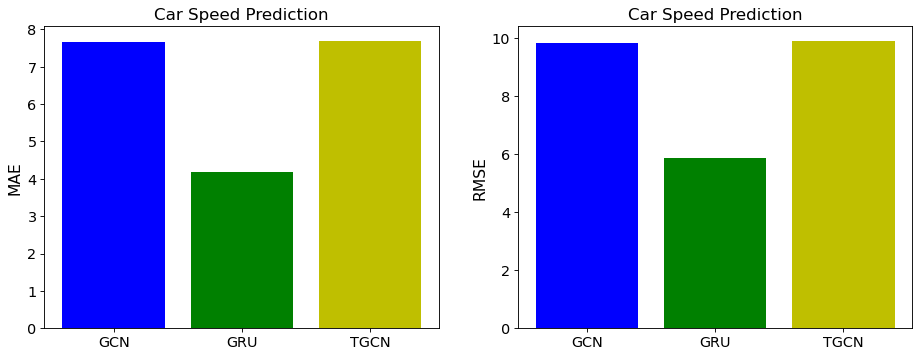

In [57]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import numpy as np


figure(figsize=(14, 5), dpi=80)

plt.subplot(1, 2, 1)

height = [round(results_holder["GCN"]['MAE'],2), round(results_holder["GRU"]['MAE'],2),
          round(results_holder["TGCN"]['MAE'] ,2)]

bars = ('GCN', 'GRU', 'TGCN')
y_pos = np.arange(len(bars))

plt.bar(y_pos, height, color=['b', 'g', 'y'])
plt.xticks(y_pos, bars)


plt.title('Car Speed Prediction', fontsize=15)

plt.ylabel('MAE', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.subplot(1, 2, 2)


height = [round(results_holder["GCN"]['RMSE'],2), round(results_holder["GRU"]['RMSE'],2),
          round(results_holder["TGCN"]['RMSE'] ,2)]


bars = ('GCN', 'GRU', 'TGCN')
y_pos = np.arange(len(bars))

plt.bar(y_pos, height, color=['b', 'g', 'y'])
plt.xticks(y_pos, bars)


plt.title('Car Speed Prediction', fontsize=15)

plt.ylabel('RMSE', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.show()

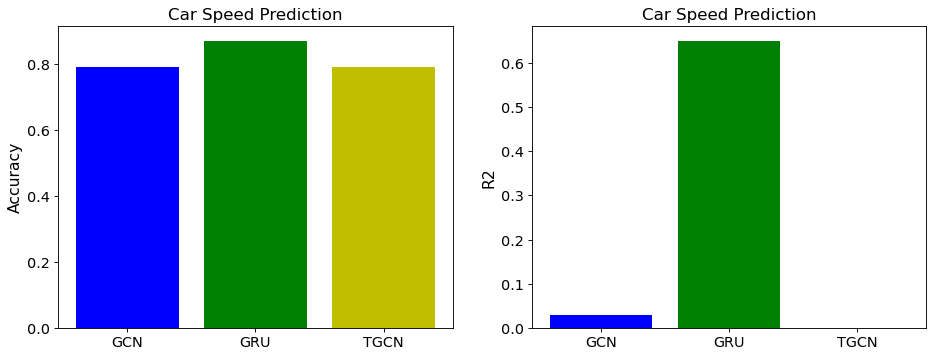

In [58]:
from matplotlib.pyplot import figure

figure(figsize=(14, 5), dpi=80)

plt.subplot(1, 2, 1)

height = [round(results_holder["GCN"]['accuracy'],2), round(results_holder["GRU"]['accuracy'],2),
          round(results_holder["TGCN"]['accuracy'] ,2)]

bars = ('GCN', 'GRU', 'TGCN')
y_pos = np.arange(len(bars))

plt.bar(y_pos, height, color=['b', 'g', 'y'])
plt.xticks(y_pos, bars)


plt.title('Car Speed Prediction', fontsize=15)

plt.ylabel('Accuracy', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.subplot(1, 2, 2)


height = [round(results_holder["GCN"]['R2'],2), round(results_holder["GRU"]['R2'],2),
          round(results_holder["TGCN"]['R2'] ,2)]


bars = ('GCN', 'GRU', 'TGCN')
y_pos = np.arange(len(bars))

plt.bar(y_pos, height, color=['b', 'g', 'y'])
plt.xticks(y_pos, bars)


plt.title('Car Speed Prediction', fontsize=15)

plt.ylabel('R2', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.show()